In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as pl
import seaborn as sns

In [2]:
data=pd.read_csv("D:/Data/cetpa_ml/logistic case study life survival prediction.csv")
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S
1,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S
2,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S
3,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S
4,1,1,"Anderson, Mr. Harry",male,48.0,0,0,26.5500,S
5,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,0.0000,S
6,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,51.4792,S
7,1,0,"Astor, Col. John Jacob",male,47.0,1,0,227.5250,C
8,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,227.5250,C
9,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,69.3000,C


<AxesSubplot:>

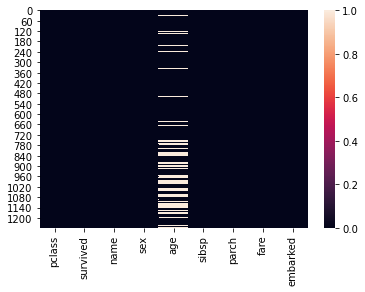

In [3]:
sns.heatmap(data.isnull())

In [4]:
data["age"].fillna(data["age"].mean(),inplace=True)

In [5]:
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [6]:
data.pop("name")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1257 non-null   int64  
 1   survived  1257 non-null   int64  
 2   sex       1257 non-null   object 
 3   age       1257 non-null   float64
 4   sibsp     1257 non-null   int64  
 5   parch     1257 non-null   int64  
 6   fare      1257 non-null   float64
 7   embarked  1257 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 78.7+ KB


In [7]:
gender=pd.get_dummies(data["sex"],drop_first=True)
gender.head(10)

,male
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,1
8,0
9,0


In [8]:
Emb=pd.get_dummies(data["embarked"],drop_first=True)
Emb.head(10)

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,0
8,0,0
9,0,0


In [9]:
data=pd.concat((data,gender,Emb),axis=1)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,male,Q,S
0,1,1,female,29.0,0,0,211.3375,S,0,0,1
1,1,0,female,2.0,1,2,151.5500,S,0,0,1
2,1,0,male,30.0,1,2,151.5500,S,1,0,1
3,1,0,female,25.0,1,2,151.5500,S,0,0,1
4,1,1,male,48.0,0,0,26.5500,S,1,0,1


In [10]:
data=data.drop(["sex","embarked"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1257 non-null   int64  
 1   survived  1257 non-null   int64  
 2   age       1257 non-null   float64
 3   sibsp     1257 non-null   int64  
 4   parch     1257 non-null   int64  
 5   fare      1257 non-null   float64
 6   male      1257 non-null   uint8  
 7   Q         1257 non-null   uint8  
 8   S         1257 non-null   uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 62.7 KB


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

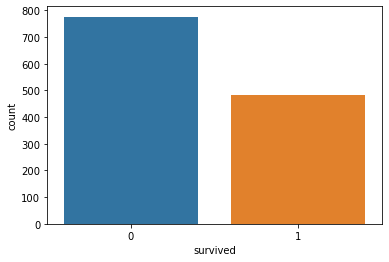

In [11]:

sns.countplot(data["survived"])

In [12]:
x=data.drop(["survived"],axis=1)
y=data["survived"]

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtf=DecisionTreeClassifier()

In [24]:
from  sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
dtf.fit(x_train,y_train)
y_pred=dtf.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [27]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[243  73]
 [ 60 127]]
0.73558648111332
